# 1. sibsp와 parch라는 이 2개의 변수를 통해 가족이 있는가라는 질문에 대한 답을 얻고싶다면 차원 축소가 가능한 사례인가?
## Yes, 형제자매(sibsp) 또는 부모자식(parch)이 존재하면 가족이 있다고 판단할 수 있기 때문에 축소할 수 있다.

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn import preprocessing

In [24]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 2. 가족 family라는 변수 하나로 feature extraction하고, 위 두 개의 변수를 삭제한 후 그 데이터프레임을 출력하시오, 단, family 변수는 가족이 있으면 1, 가족이 없으면 0이라는 값을 가지도록 구현하시오.

In [25]:
titanic['family'] = titanic.apply(lambda x: 1 if x['sibsp'] + x['parch'] > 0 else 0, axis=1)
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)

titanic

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


# 3. 해당 feature가 정규분포에 가까움을 시각화하여 보여주시오.
## iris 데이터셋의 sepal width (cm) 컬럼이 정규분포에 가깝다고 판단됨.

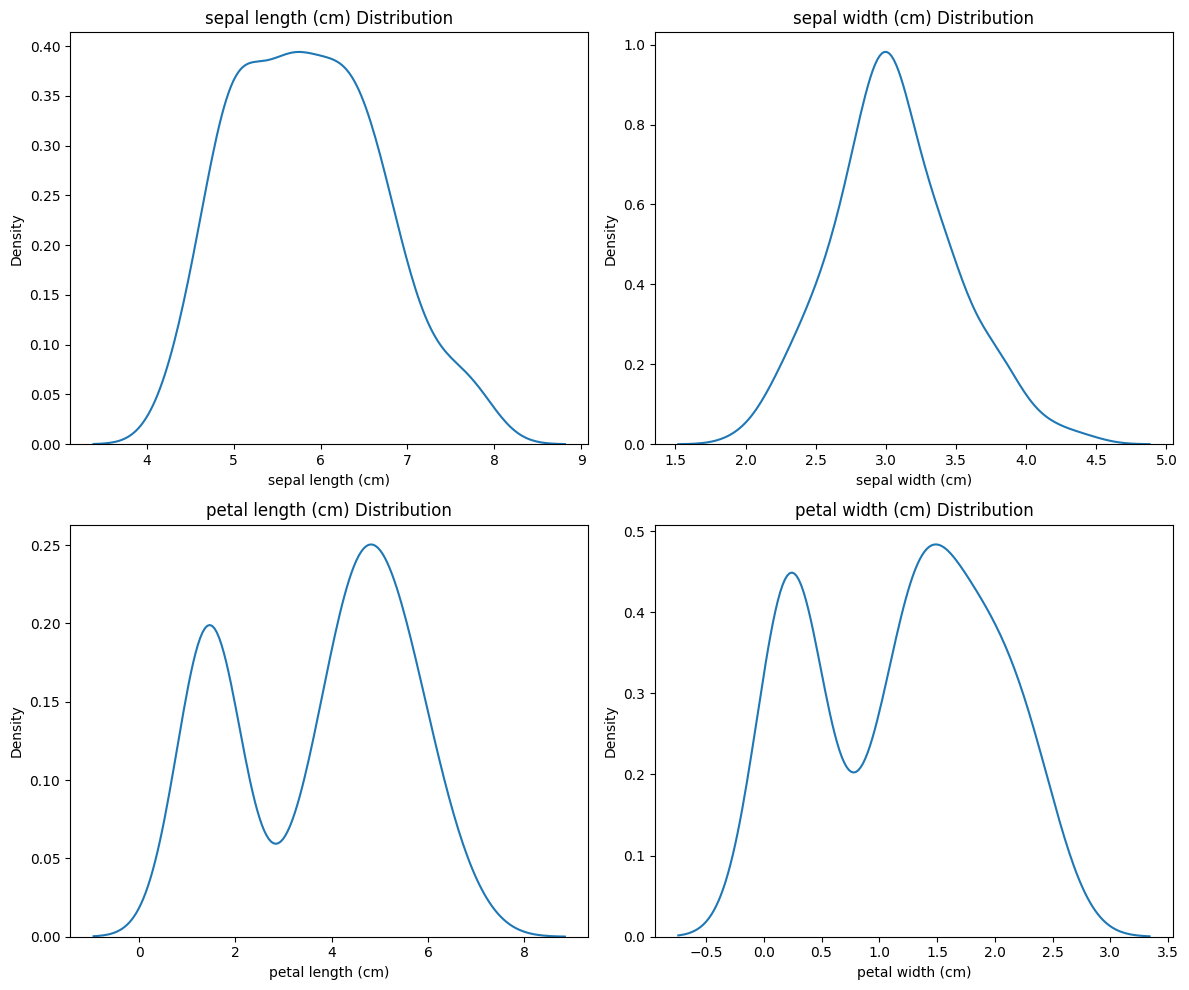

In [26]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 시각화
plt.figure(figsize=(12, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(iris_df[feature])
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


# 해당 feature를 표준화하여 변경하고 그 데이터프레임을 출력하시오.

In [27]:
iris_df['sepal width (cm)']  = preprocessing.scale(iris_df['sepal width (cm)'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,1.019004,1.4,0.2
1,4.9,-0.131979,1.4,0.2
2,4.7,0.328414,1.3,0.2
3,4.6,0.098217,1.5,0.2
4,5.0,1.249201,1.4,0.2
